# Market Basket Analysis / Affinity Analysis


This code is based on an article on MBA at https://towardsdatascience.com/affinity-analysis-market-basket-analysis-c8e7fcc61a21

### Create transation data

In [1]:
my_basket=[['bread','butter','wine','bananas','coffee','carrots'],
          ['tomatoes','onions','cheese','milk','potatoes'],
          ['beer','chips','asparagus','salsa','milk','apples'],
          ['olive oil','bread','butter','tomatoes','steak','carrots'],
          ['tomatoes','onions','chips','wine','ketchup','orange juice'],
          ['bread','butter','beer','chips','milk'],
          ['butter','tomatoes','carrots','coffee','sugar'],
          ['tomatoes','onions','cheese','milk','potatoes'],
          ['bread','butter','ketchup','coffee','chicken wings'],
          ['butter','beer','chips','asparagus','apples'],
          ['tomatoes','onion','beer','chips','milk','coffee']]

In [2]:
my_basket

[['bread', 'butter', 'wine', 'bananas', 'coffee', 'carrots'],
 ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
 ['beer', 'chips', 'asparagus', 'salsa', 'milk', 'apples'],
 ['olive oil', 'bread', 'butter', 'tomatoes', 'steak', 'carrots'],
 ['tomatoes', 'onions', 'chips', 'wine', 'ketchup', 'orange juice'],
 ['bread', 'butter', 'beer', 'chips', 'milk'],
 ['butter', 'tomatoes', 'carrots', 'coffee', 'sugar'],
 ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
 ['bread', 'butter', 'ketchup', 'coffee', 'chicken wings'],
 ['butter', 'beer', 'chips', 'asparagus', 'apples'],
 ['tomatoes', 'onion', 'beer', 'chips', 'milk', 'coffee']]

### Calculate metrics

In [3]:
def frequency_items (x,y):
    fx_=sum([x in i for i in my_basket])
    fy_=sum([y in i for i in my_basket])
    
    fxy_=sum([all(z in i for z in [x,y]) for i in my_basket])
    
    support=fxy_/len(my_basket)
    confidence = support/(fx_/len(my_basket))
    lift =confidence /(fy_/len(my_basket))
    if confidence ==1:
        conviction = 0
    else:
        conviction=(1-(fy_/len(my_basket)))/(1-confidence)
    
    print("Support = {}".format(round(support,2)))
    print("Confidence = {}".format(round(confidence,2)))
    print("Lift= {}".format(round(lift,2)))
    print("Conviction={}".format(round(conviction,2)))

In [4]:
frequency_items('bread','butter')

Support = 0.36
Confidence = 1.0
Lift= 1.83
Conviction=0


In [7]:
['bread' in i for i in my_basket]

[True, False, False, True, False, True, False, False, True, False, False]

In [8]:
[all(z in i for z in ['bread','butter']) for i in my_basket]

[True, False, False, True, False, True, False, False, True, False, False]

# Kaggle Data for groceries

In [11]:
import csv

with open('groceries.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [13]:
!pip install mlxtend
import mlxtend.frequent_patterns 
import mlxtend.preprocessing

encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(data)

print(encode_arr)

[[False False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False  True False]
 ...
 [ True False  True ... False  True False]
 [ True False False ... False False False]
 [ True False False ... False False False]]


In [15]:
import pandas as pd
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,,1,10,11,12,13,14,15,16,17,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,True,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9832,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9833,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9834,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df,
                                           min_support=0.01, 
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.999797,()
1,0.219500,(1)
2,0.025010,(10)
3,0.018503,(11)
4,0.011895,(12)
5,0.167039,(2)
6,0.132066,(3)
7,0.102176,(4)
8,0.086926,(5)
9,0.065575,(6)


In [17]:
rules=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="confidence",min_threshold=0.06,support_only=False)

rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(),(1),0.999797,0.219500,0.219500,0.219544,1.000203,0.000045,1.000057
1,(1),(),0.219500,0.999797,0.219500,1.000000,1.000203,0.000045,inf
2,(10),(),0.025010,0.999797,0.025010,1.000000,1.000203,0.000005,inf
3,(11),(),0.018503,0.999797,0.018503,1.000000,1.000203,0.000004,inf
4,(12),(),0.011895,0.999797,0.011895,1.000000,1.000203,0.000002,inf
5,(),(2),0.999797,0.167039,0.167039,0.167073,1.000203,0.000034,1.000041
6,(2),(),0.167039,0.999797,0.167039,1.000000,1.000203,0.000034,inf
7,(),(3),0.999797,0.132066,0.132066,0.132093,1.000203,0.000027,1.000031
8,(3),(),0.132066,0.999797,0.132066,1.000000,1.000203,0.000027,inf
9,(),(4),0.999797,0.102176,0.102176,0.102196,1.000203,0.000021,1.000023


In [18]:
rules2=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="lift",min_threshold=0.06,support_only=False)

rules2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(),(1),0.999797,0.219500,0.219500,0.219544,1.000203,0.000045,1.000057
1,(1),(),0.219500,0.999797,0.219500,1.000000,1.000203,0.000045,inf
2,(),(10),0.999797,0.025010,0.025010,0.025015,1.000203,0.000005,1.000005
3,(10),(),0.025010,0.999797,0.025010,1.000000,1.000203,0.000005,inf
4,(),(11),0.999797,0.018503,0.018503,0.018507,1.000203,0.000004,1.000004
5,(11),(),0.018503,0.999797,0.018503,1.000000,1.000203,0.000004,inf
6,(),(12),0.999797,0.011895,0.011895,0.011897,1.000203,0.000002,1.000002
7,(12),(),0.011895,0.999797,0.011895,1.000000,1.000203,0.000002,inf
8,(),(2),0.999797,0.167039,0.167039,0.167073,1.000203,0.000034,1.000041
9,(2),(),0.167039,0.999797,0.167039,1.000000,1.000203,0.000034,inf


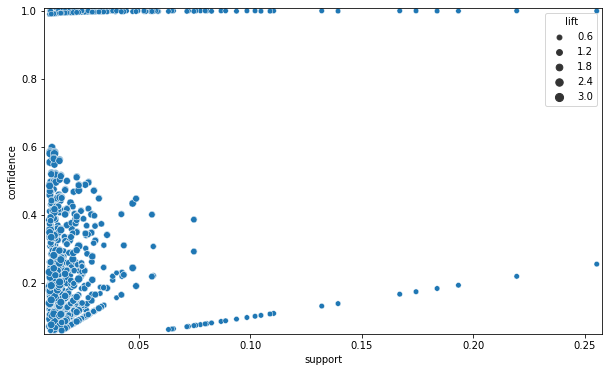

In [23]:
!pip install networkx
!pip install seaborn
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()